In [3]:
import pandas as pd
movies = pd.read_csv('fandango_score_comparison.csv')
movies.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

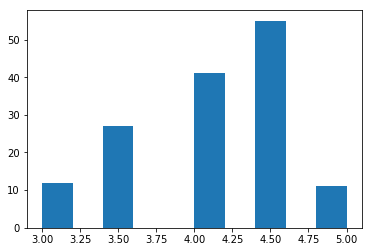

In [8]:
plt.hist(movies.Fandango_Stars)
plt.show()

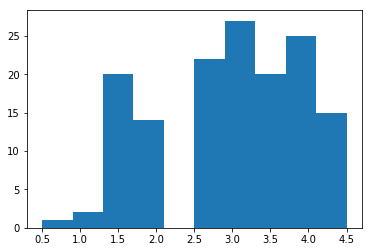

In [9]:
plt.hist(movies.Metacritic_norm_round)
plt.show()

In [18]:
movies.describe()[['Fandango_Stars','Metacritic_norm_round']]

,Fandango_Stars,Metacritic_norm_round
count,146.000000,146.000000
mean,4.089041,2.972603
std,0.540386,0.990961
min,3.000000,0.500000
25%,3.500000,2.125000
50%,4.000000,3.000000
75%,4.500000,4.000000
max,5.000000,4.500000


In [25]:
print(movies.Fandango_Stars.median())
print(movies.Metacritic_norm_round.median())

4.0
3.0


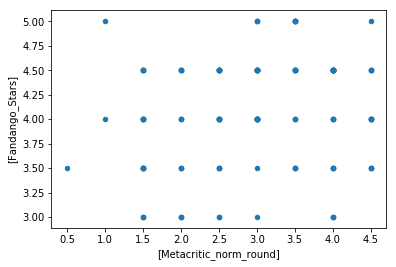

In [28]:
movies.plot.scatter(['Metacritic_norm_round'],['Fandango_Stars'])

In [50]:
movies['fm_diff'] = abs(movies.Fandango_Stars - movies.Metacritic_norm_round)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 23 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [51]:
movies_sorted = movies.sort_values(by='fm_diff',ascending = False)

In [54]:
movies_sorted.head(5)[['Fandango_Stars','Metacritic_norm_round']]

,Fandango_Stars,Metacritic_norm_round
3,5.0,1.0
85,4.5,1.5
47,4.5,1.5
19,4.5,1.5
134,4.5,1.5


In [57]:
import scipy.stats as spy

fm_r_value = spy.pearsonr(movies.Fandango_Stars, movies.Metacritic_norm_round)
print(fm_r_value)

(0.17844919073895918, 0.031161516228523815)


In [87]:
slope, intercept, rvalue, pvalue, stderr = spy.linregress( movies.Metacritic_norm_round,movies.Fandango_Stars)
print(slope, intercept)

0.0973110779739 3.7997739189


In [88]:
pred_3 = slope * 3 + intercept

In [89]:
print(pred_3)

4.09170715282


In [90]:
pred_1 = slope * 1 + intercept
pred_1

3.897084996873347

In [91]:
pred_5 = slope * 5 + intercept
pred_5

4.2863293087690604

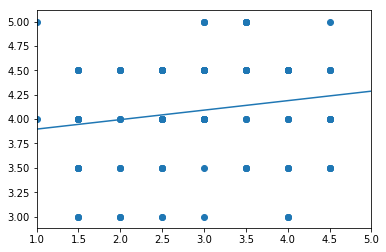

In [97]:
plt.scatter(movies.Metacritic_norm_round,movies.Fandango_Stars)
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1.0,5.0)
plt.show()